In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('Iris.csv')

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

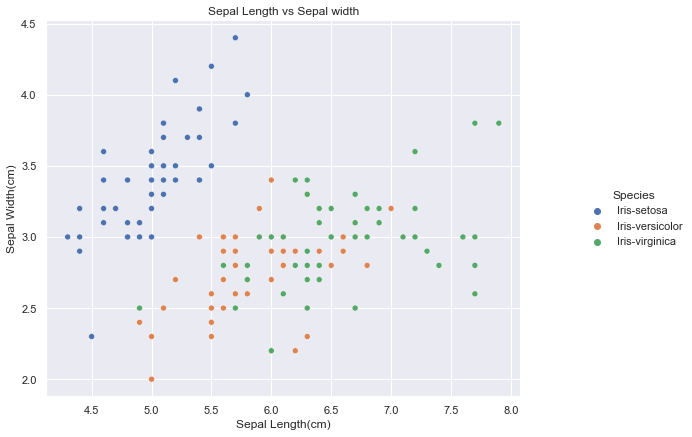

In [30]:
#ploting of Sepal length vs width
sns.set_theme()
#plt.figure(figsize=(12,8))
sns.relplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'], data=df)
#plt.scatter(df.SepalLengthCm,df.SepalWidthCm)
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Sepal Length vs Sepal width')
fig=plt.gcf()
fig.set_size_inches(10,6)

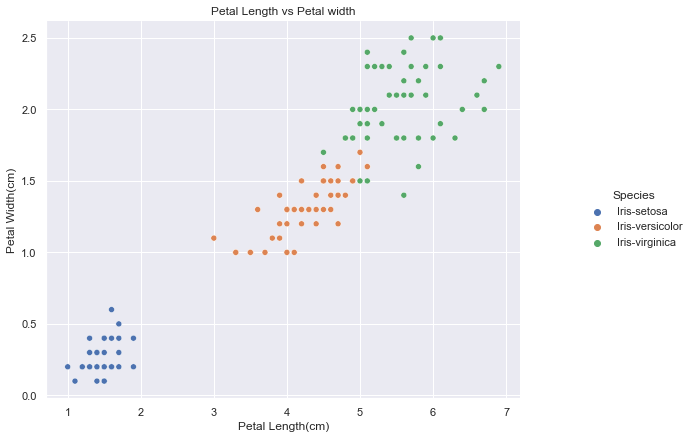

In [31]:
#ploting of Sepal length vs width
sns.set_theme()
#plt.figure(figsize=(12,8))
sns.relplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],hue=df['Species'], data=df)
#plt.scatter(df.SepalLengthCm,df.SepalWidthCm)
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Petal Length vs Petal width')
fig=plt.gcf()
fig.set_size_inches(10,6)

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

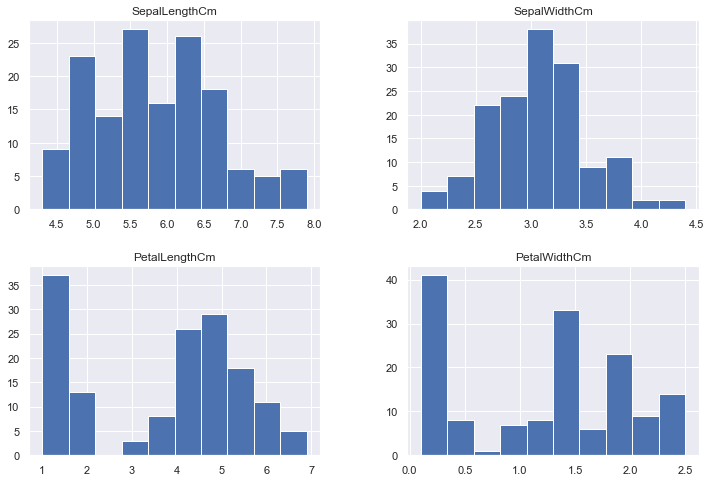

In [49]:
df2=df.drop(['Id'], axis = 1)
df2.hist()
fig=plt.gcf()
fig.set_size_inches(12,8)

###### Now let us see how the length and width vary according to the species

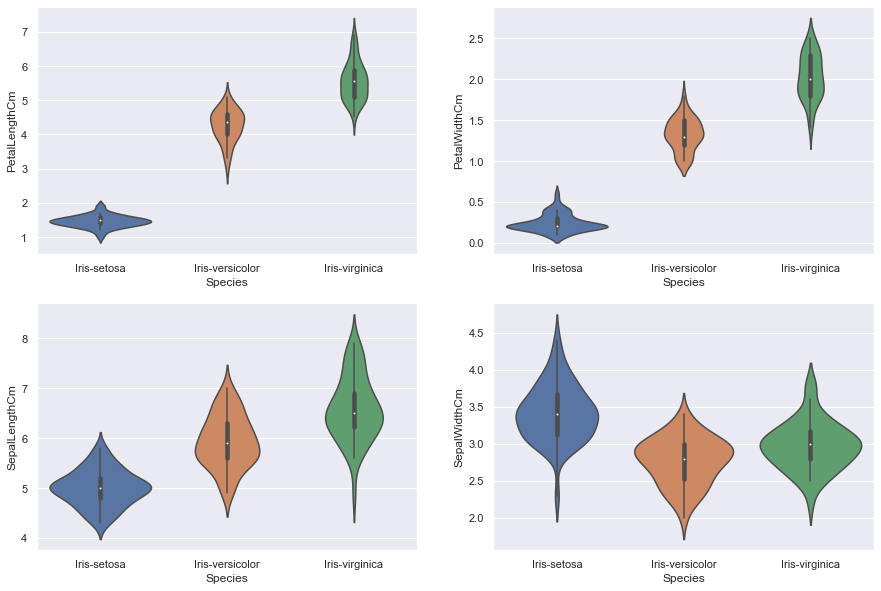

In [63]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

In [70]:
df.shape

(150, 6)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

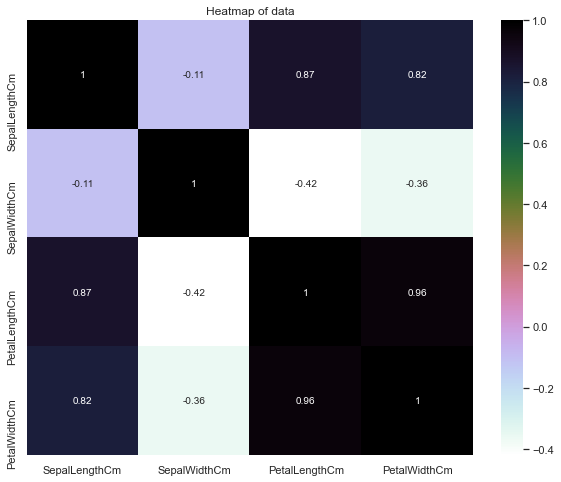

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True,cmap='cubehelix_r')
plt.title('Heatmap of data')
plt.show()

 ###### Observation

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

In [77]:
#splitting train test data
train, test =train_test_split(df2,test_size=0.2)

In [83]:
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [84]:
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

In [85]:
train_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,5.1,3.8,1.5,0.3
131,7.9,3.8,6.4,2.0
34,4.9,3.1,1.5,0.1
47,4.6,3.2,1.4,0.2
96,5.7,2.9,4.2,1.3


In [86]:
test_X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
111,6.4,2.7,5.3,1.9
27,5.2,3.5,1.5,0.2
36,5.5,3.5,1.3,0.2
49,5.0,3.3,1.4,0.2
123,6.3,2.7,4.9,1.8


In [87]:
train_y.head()

19         Iris-setosa
131     Iris-virginica
34         Iris-setosa
47         Iris-setosa
96     Iris-versicolor
Name: Species, dtype: object

In [88]:
test_y.head()

111    Iris-virginica
27        Iris-setosa
36        Iris-setosa
49        Iris-setosa
123    Iris-virginica
Name: Species, dtype: object

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))



In [89]:
model=LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

/Users/eswarbattula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
print(metrics.accuracy_score(prediction,test_y))

0.9666666666666667


In [98]:
prediction

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [99]:
petal=df2[['PetalLengthCm','PetalWidthCm','Species']]
sepal=df2[['SepalLengthCm','SepalWidthCm','Species']]

In [100]:
train_p, test_p =train_test_split(petal,test_size=0.2)
train_s, test_s =train_test_split(sepal,test_size=0.2)

In [106]:
train_p_x=train_p[['PetalLengthCm','PetalWidthCm']]
train_p_y=train_p.Species
test_p_x=test_p[['PetalLengthCm','PetalWidthCm']]
test_p_y=test_p.Species


train_s_x=train_s[['SepalLengthCm','SepalWidthCm']]
train_s_y=train_s.Species
test_s_x=test_p[['PetalLengthCm','PetalWidthCm']]
test_s_y=test_p.Species


In [107]:
train_p_x.head()

,PetalLengthCm,PetalWidthCm
27,1.5,0.2
20,1.7,0.2
73,4.7,1.2
91,4.6,1.4
109,6.1,2.5


###### Logistic Regression

In [111]:
model=LogisticRegression()
model.fit(train_p_x,train_p_y)
prediction=model.predict(test_p_x)
print(metrics.accuracy_score(prediction,test_p_y))

0.9333333333333333


In [110]:
model.fit(train_s_x,train_s_y)
prediction=model.predict(test_s_x)
print(metrics.accuracy_score(prediction,test_s_y))

0.6333333333333333
